In [1]:
import pandas as pd
import matplotlib.pyplot as plt #pyplot package under the matplotlib package
import seaborn as sns
plt.style.use("ggplot")
from modules import data

In [2]:
df = data.get_data()

In [3]:
df.columns

Index(['year', 'Revenue', 'Interest_Expense_(Operating)', 'EBT',
       'Income_Tax_Provision', 'Net_Income_Common', 'EPS_(Diluted)',
       'Shares_(Diluted,_Weighted)', 'Gross_Margin', 'Net_Profit_Margin',
       'Free_Cash_Flow_Margin', 'Operating_Cash_Flow_Margin',
       'Cash_and_Short_Term_Investments', 'Total_current_assets',
       'Total_non-current_assets', 'Total_Assets', 'Total_current_liabilities',
       'Total_non-current_liabilities', 'Total_liabilities',
       'Shareholders_Equity_(Total)', 'Total_Debt', 'Operating_Cash_Flow',
       'Investing_cash_flow', 'Equity_Repurchase_(Common,_Net)',
       'Dividends_Paid_(Total)', 'Financing_cash_flow',
       'Stock_Based_Compensation', 'P/E_ratio', 'P/FCF_ratio',
       'P/Operating_CF', 'P/B_ratio', 'Current_Ratio', 'Debt/Assets',
       'Debt/Equity', 'Interest_Coverage', 'ROE', 'ROA', 'ROIC',
       'Book_value_per_Share', 'Free_Cash_Flow', 'dividend_per_share',
       'payout_ratio'],
      dtype='object', name='Unname

In [4]:
axis = list(df["year"])
axis = sorted(axis)
axis

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# profitability

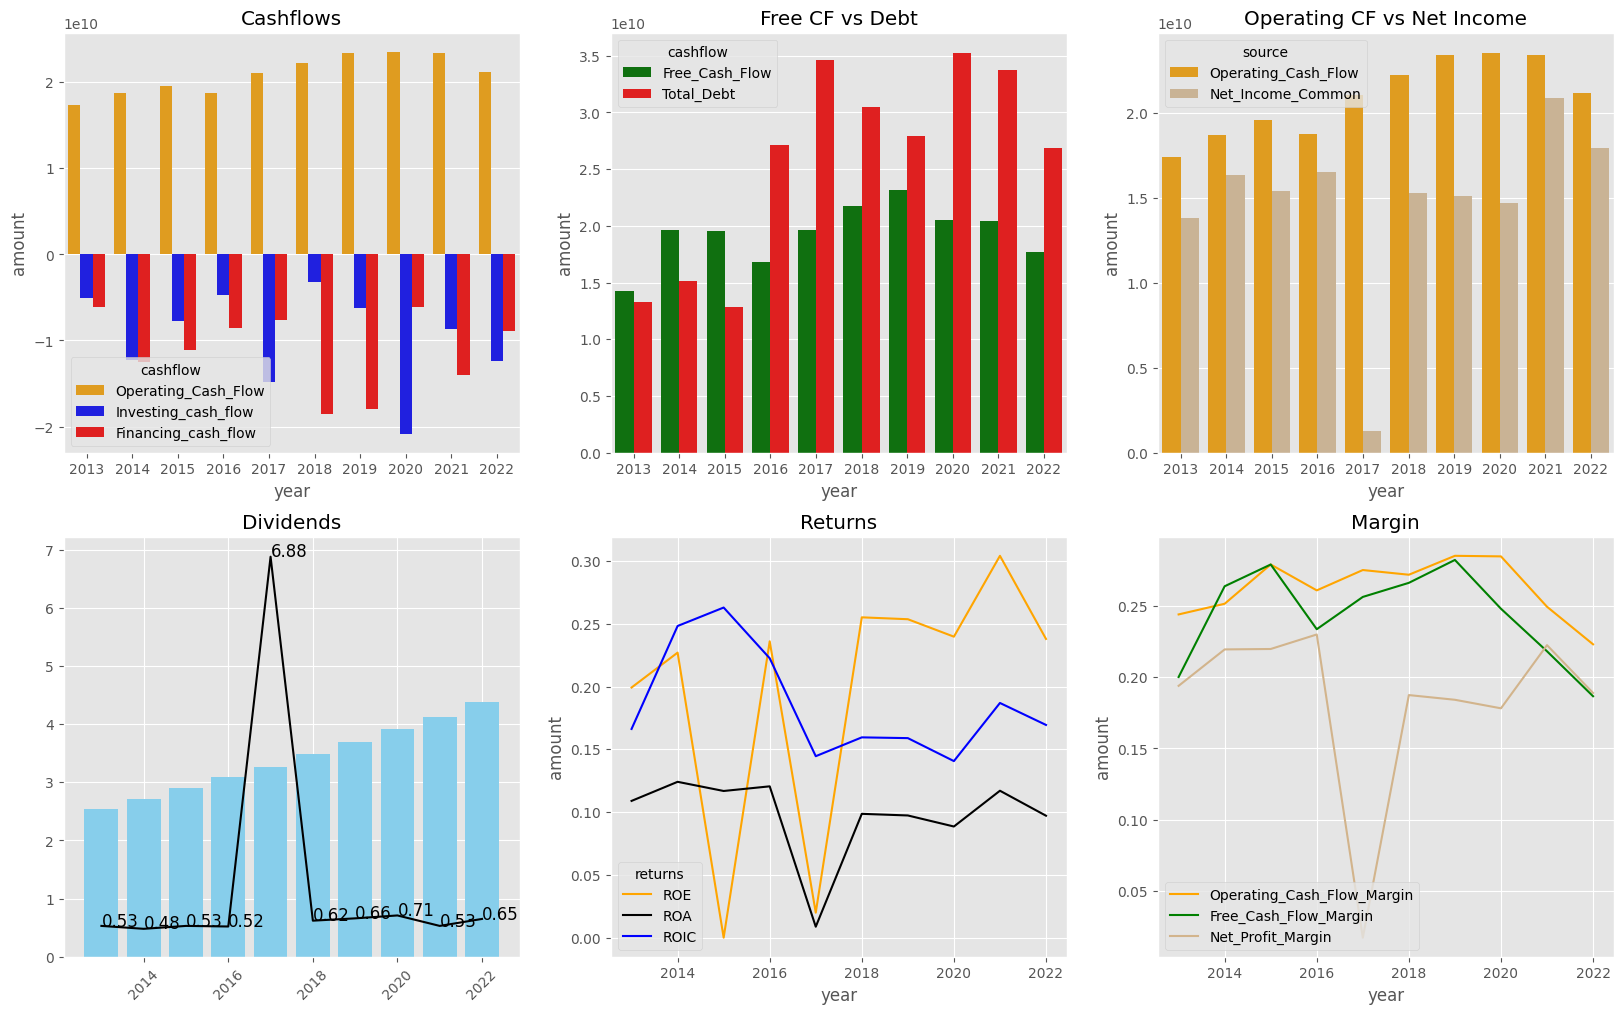

In [5]:
fig, axes = plt.subplots(2, 3,figsize=(20,12))


cashflow_df = df[["year","Operating_Cash_Flow","Investing_cash_flow", "Financing_cash_flow"]]
cashflow_df = cashflow_df.melt(id_vars="year",var_name="cashflow",value_name="amount")
sns.barplot(x= "year", y="amount", data= cashflow_df, hue = "cashflow", palette = ["orange", "blue", "red"], order=axis, ax=axes[0,0])
axes[0,0].set(title="Cashflows")

fcf_df = df[["year","Free_Cash_Flow", "Total_Debt"]]
fcf_df = fcf_df.melt(id_vars="year",var_name="cashflow",value_name="amount")
sns.barplot(x= "year", y="amount", data=fcf_df, hue = "cashflow", palette = ["green", "red"], order=axis, ax=axes[0,1])
axes[0,1].set(title="Free CF vs Debt")

cashflow_income= df[["year","Operating_Cash_Flow",'Net_Income_Common']]
cashflow_income = cashflow_income.melt(id_vars="year",var_name="source",value_name="amount")
sns.barplot(x="year", y="amount", data=cashflow_income, hue = "source", 
            palette = ["orange", "tan"], order=axis,ax=axes[0,2])
axes[0,2].set(title="Operating CF vs Net Income")

axes[1,0].bar(df["year"], df["dividend_per_share"],color = "skyblue")
axes[1,0].plot(df["year"], df["payout_ratio"], color="black")
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set(title="Dividends")
for index in range(len(df["year"])):
  axes[1,0].text(df["year"][index], df["payout_ratio"][index], df["payout_ratio"][index], size=12)



returns = df[["year","ROE",'ROA',"ROIC"]]
returns = returns.melt(id_vars="year",var_name="returns",value_name="amount")
sns.lineplot(x="year", y="amount", data=returns, hue = "returns", 
             palette = ["orange", "black","blue"], ax=axes[1,1])
# sns.lineplot(x=df["year"], y= df["ROA"], ax=axes[1,1])
# sns.lineplot(x=df["year"], y= df["ROIC"], ax=axes[1,1])
axes[1,1].set(title="Returns")

margins = df[["year","Operating_Cash_Flow_Margin", "Free_Cash_Flow_Margin", "Net_Profit_Margin"]]
margins = margins.melt(id_vars="year",var_name="margins",value_name="amount")
sns.lineplot(x="year", y="amount", data=margins, hue = "margins", 
             palette = ["orange", "green","tan"], ax=axes[1,2])
axes[1,2].set(title="Margin")
axes[1,2].legend(loc="lower left")

In [ ]:
['year', 'Revenue', 'Interest_Expense_(Operating)', 'EBT',
       'Income_Tax_Provision', 'Net_Income_Common', 'EPS_(Diluted)',
       'Shares_(Diluted,_Weighted)', 'Gross_Margin', 'Net_Profit_Margin',
       'Free_Cash_Flow_Margin', 'Operating_Cash_Flow_Margin',
       'Cash_and_Short_Term_Investments', 'Total_current_assets',
       'Total_non-current_assets', 'Total_Assets', 'Total_current_liabilities',
       'Total_non-current_liabilities', 'Total_liabilities',
       'Shareholders_Equity_(Total)', 'Total_Debt', 'Operating_Cash_Flow',
       'Investing_cash_flow', 'Equity_Repurchase_(Common,_Net)',
       'Financing_cash_flow', 'Stock_Based_Compensation', 'P/E_ratio',
       'P/FCF_ratio', 'P/Operating_CF', 'P/B_ratio', 'Current_Ratio',
       'Debt/Assets', 'Debt/Equity', 'Interest_Coverage', 'ROE', 'ROA', 'ROIC',
       'Book_value_per_Share', 'Free_Cash_Flow', 'dividend_per_share']

# financial health

In [ ]:
fig2, axes = plt.subplots(2, 3,figsize=(20,12))

balancesheet_prop= df[["year",'Cash_and_Short_Term_Investments', "Total_Debt", 'Total_Assets']]
balancesheet_prop = balancesheet_prop.melt(id_vars="year",var_name="source",value_name="amount")
sns.barplot(x ="year",y= "amount", data=balancesheet_prop, hue = "source", palette = ["green", "red", 'black', "black"], order=axis,ax=axes[0,0])
axes[0,0].set(title="Cash, Debt and Total Asset")

balancesheet_df = df[["year",'Shareholders_Equity_(Total)',
                      'Total_current_liabilities',
                      'Total_non-current_liabilities']]
balancesheet_df = balancesheet_df.set_index("year").sort_index()
balancesheet_df = balancesheet_df.div(balancesheet_df.sum(axis=1), axis=0)
balancesheet_df.plot(kind='bar', stacked=True, color=['blue', 'brown', 'red'], ax=axes[0,1])
axes[0,1].set(title="Balancesheet Proportion")

bs_ratio_df = df[["year","Current_Ratio", "Debt/Equity"]]
bs_ratio_df = bs_ratio_df.melt(id_vars="year",var_name="ratio",value_name="amount")
sns.lineplot(x= bs_ratio_df["year"], y= bs_ratio_df["amount"],hue=bs_ratio_df["ratio"], palette=["blue", "red"], ax=axes[0,2])
sns.lineplot(x= bs_ratio_df["year"], y=1, color = "black", linestyle="--", ax=axes[0,2])
axes[0,2].set(title="Current Ratio and Debt to Equity")


axes[1,0].plot(df["year"], df["Interest_Coverage"], color="red")
axes[1,0].axhline(y=1, color = "black", linestyle="--")

In [ ]:
df["Stock_Based_Compensation"]

In [ ]:
df["Equity_Repurchase_(Common,_Net)"]